## Imports

In [1]:
import os
current_file_dir = os.getcwd()
os.chdir("../../codes/")

from src.load_explanations import load_explanations_of_many_models
from src.compare_explanations import compare_explanations, cohens_kappa_metric
from src import strings_to_classes_mappings

os.chdir(current_file_dir)

In [4]:
print("Possible datasets:", list(strings_to_classes_mappings.datasets_mapping.keys()))
print("Possible models:", list(strings_to_classes_mappings.models_mapping.keys()))
print("Possible explanations:", list(strings_to_classes_mappings.explanations_mapping.keys()))
models_list = ["ViT_B_32"]

Possible datasets: ['imagenette2']
Possible models: ['ConvNeXtV2_Nano', 'DeiT_S', 'DeiT_T', 'DenseNet121', 'EfficientNet_B3', 'EfficientNet_B4', 'MobileNetV3', 'PyramidViT_V2_B2', 'Res2Net50', 'ResNet18', 'ResNet50', 'ResNeXt50', 'Swin_T', 'ViT_B_32']
Possible explanations: ['GradCAM', 'IntegratedGradients', 'KernelSHAP', 'AttentionRollout']


# Getting data

In [5]:
paths_to_explanations = {
    "GradCAM" : os.path.join(current_file_dir, os.pardir, "20240620-gradcam-kernelshap-ig-128"),
    "AttentionRollout" : os.path.join(current_file_dir, "attention-rollout"),
}

In [6]:
explanations_many_models = load_explanations_of_many_models('imagenette2', models_list, 'GradCAM', root_explanations=paths_to_explanations['GradCAM'])

Loading explanations: 100%|██████████| 128/128 [00:02<00:00, 59.47it/s]


Loaded 128 common explanations for each model.


In [7]:
attention_rollout_explanations = load_explanations_of_many_models('imagenette2', models_list, 'AttentionRollout', root_explanations=paths_to_explanations['AttentionRollout'])

Loading explanations: 100%|██████████| 128/128 [00:01<00:00, 92.83it/s]


Loaded 128 common explanations for each model.


In [10]:
attention_rollout_explanations[0].keys()

dict_keys(['explanations', 'paths', 'labels', 'model_name', 'explanation_name', 'predictions'])

In [11]:
a = explanations_many_models[0]
a['model_name'] = a['explanation_name']
b = attention_rollout_explanations[0]
b['model_name'] = b['explanation_name']
both_explanation_methods = [a, b]

In [16]:
both_explanation_methods[1]['model_name']

'AttentionRollout'

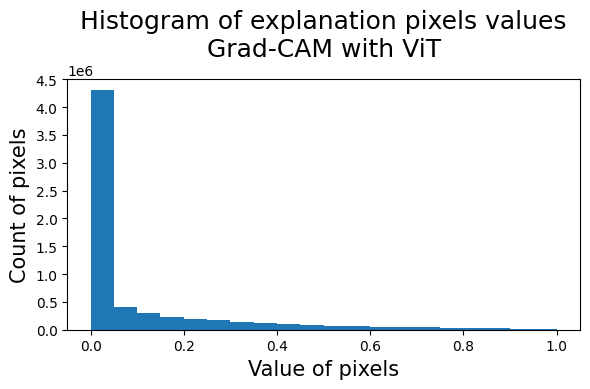

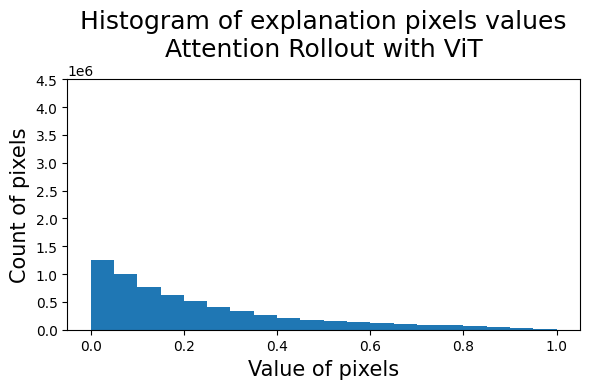

In [111]:
import torch
import matplotlib.pyplot as plt

# Convert the matrix to a 1D array of values for histogram plotting
values = a['explanations'].flatten().numpy()

# Plot the histogram of values
plt.figure(figsize=(6,4))
plt.hist(values, bins=20)
plt.ylim((0,10**6*4.5))
plt.xlabel("Value of pixels", fontsize=15)
plt.ylabel("Count of pixels", fontsize=15)
plt.title("Histogram of explanation pixels values\nGrad-CAM with ViT", fontsize=18)
plt.tight_layout()
plt.savefig('pixel_values_histogram_gradcam.png')
plt.show()

# Convert the matrix to a 1D array of values for histogram plotting
values = b['explanations'].flatten().numpy()

# Plot the histogram of values
plt.figure(figsize=(6,4))
plt.hist(values, bins=20)
plt.ylim((0,10**6*4.5))
plt.xlabel("Value of pixels", fontsize=15)
plt.ylabel("Count of pixels", fontsize=15)
plt.title("Histogram of explanation pixels values\nAttention Rollout with ViT", fontsize=18)
plt.tight_layout()
plt.savefig('pixel_values_histogram_attentionrollout.png')
plt.show()


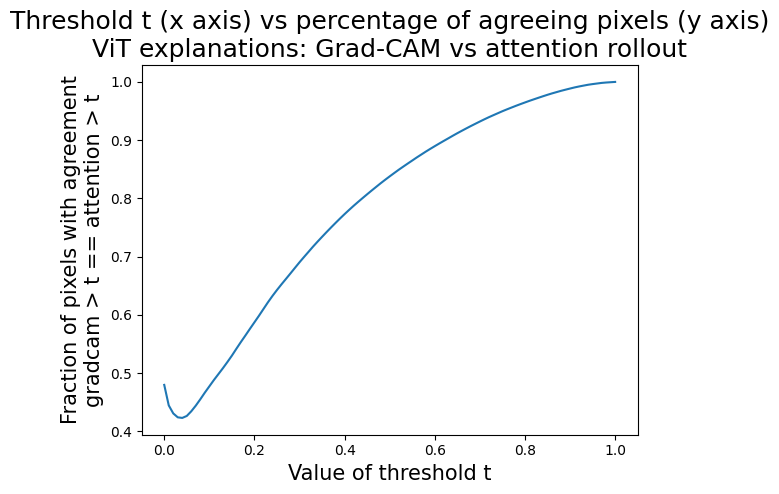

In [105]:
v = []
for t in [0.01 * tt for tt in range(0,101)]:
    v.append(((a['explanations'] > t) == (b['explanations'] > t)).sum() / a['explanations'].flatten().shape[0])
plt.plot([0.01 * tt for tt in range(0,101)], v)
plt.xlabel('Value of threshold t', fontsize=15)
plt.title('Threshold t (x axis) vs percentage of agreeing pixels (y axis)\nViT explanations: Grad-CAM vs attention rollout', fontsize=18)
plt.ylabel('Fraction of pixels with agreement\ngradcam > t == attention > t', fontsize=15)
plt.savefig('theshold_review_agreement.png')
plt.show()

## Compare all explanations at once

In [82]:
from functools import partial

thresholds = [0.25]

cohens_kappa_matrix = compare_explanations(both_explanation_methods, comparison_function=partial(cohens_kappa_metric, thresholds=thresholds))
cohens_kappa_matrix.to_csv(os.path.join(current_file_dir, "cohens_kappa_matrix_vit_model.csv"))
cohens_kappa_matrix

,GradCAM,AttentionRollout
GradCAM,1.0,0.101737
AttentionRollout,0.101737,1.0


In [83]:
from functools import partial

thresholds = [0.5]

cohens_kappa_matrix = compare_explanations(both_explanation_methods, comparison_function=partial(cohens_kappa_metric, thresholds=thresholds))
cohens_kappa_matrix

,GradCAM,AttentionRollout
GradCAM,1.0,0.081581
AttentionRollout,0.081581,1.0


In [84]:
from functools import partial

thresholds = [0.75]

cohens_kappa_matrix = compare_explanations(both_explanation_methods, comparison_function=partial(cohens_kappa_metric, thresholds=thresholds))
cohens_kappa_matrix

,GradCAM,AttentionRollout
GradCAM,1.0,0.058267
AttentionRollout,0.058267,1.0


In [109]:
from functools import partial

thresholds = [0.25, 0.75]

cohens_kappa_matrix = compare_explanations(both_explanation_methods, comparison_function=partial(cohens_kappa_metric, thresholds=thresholds))
cohens_kappa_matrix

,GradCAM,AttentionRollout
GradCAM,1.0,0.084691
AttentionRollout,0.084691,1.0
